In [37]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Loading data on pandas.
df_planeAccidents = pd.read_csv('datasets//AccidentesAviones.csv')
df_planeAccidents.head()


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [39]:
#Column' names
df_planeAccidents.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [40]:
#First of all, I'll dop unnamed: column
df_planeAccidents.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_planeAccidents.columns

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [41]:
df_planeAccidents.shape

(5008, 17)

In [42]:
df_planeAccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5008 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  grou

In [43]:
# Replacing column names.
df_planeAccidents= df_planeAccidents.rename(columns={'HORA declarada': 'time',
                                                     'Ruta':'ruta',
                                                     'OperadOR':'operator',
                                                     'PASAJEROS A BORDO':'passenger_aboard',
                                                     'cantidad de fallecidos':'all_fatalities'})
df_planeAccidents.head(3)

,fecha,time,ruta,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passenger_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [44]:
#  turn 'fecha' type into datetime  
df_planeAccidents['fecha'] = pd.to_datetime(df_planeAccidents['fecha']).dt.strftime('%Y-%m-%d')
df_planeAccidents['fecha'] = pd.to_datetime(df_planeAccidents['fecha'], format='%Y-%m-%d')
df_planeAccidents.dtypes

fecha                   datetime64[ns]
time                            object
ruta                            object
operator                        object
flight_no                       object
route                           object
ac_type                         object
registration                    object
cn_ln                           object
all_aboard                      object
passenger_aboard                object
crew_aboard                     object
all_fatalities                  object
passenger_fatalities            object
crew_fatalities                 object
ground                          object
summary                         object
dtype: object

In [45]:
df_planeAccidents = df_planeAccidents.replace({'?': np.nan})

In [46]:
df_planeAccidents.head()

,fecha,time,ruta,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passenger_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [47]:
#Checking nulls
df_planeAccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 5008 non-null   datetime64[ns]
 1   time                  3504 non-null   object        
 2   ruta                  5003 non-null   object        
 3   operator              4998 non-null   object        
 4   flight_no             1326 non-null   object        
 5   route                 4246 non-null   object        
 6   ac_type               4995 non-null   object        
 7   registration          4736 non-null   object        
 8   cn_ln                 4341 non-null   object        
 9   all_aboard            4991 non-null   object        
 10  passenger_aboard      4787 non-null   object        
 11  crew_aboard           4789 non-null   object        
 12  all_fatalities        5000 non-null   object        
 13  passenger_fataliti

In [48]:
# droping null on all_aboard column
df_planeAccidents.dropna(subset=['all_aboard'], inplace=True)

In [49]:
df_planeAccidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 4991 non-null   datetime64[ns]
 1   time                  3503 non-null   object        
 2   ruta                  4986 non-null   object        
 3   operator              4981 non-null   object        
 4   flight_no             1325 non-null   object        
 5   route                 4243 non-null   object        
 6   ac_type               4980 non-null   object        
 7   registration          4729 non-null   object        
 8   cn_ln                 4339 non-null   object        
 9   all_aboard            4991 non-null   object        
 10  passenger_aboard      4787 non-null   object        
 11  crew_aboard           4789 non-null   object        
 12  all_fatalities        4991 non-null   object        
 13  passenger_fataliti

In [50]:
# turn into int type.
df_planeAccidents[['all_aboard','all_fatalities']] = df_planeAccidents[['all_aboard','all_fatalities']].astype(int)

In [51]:
# Fill all nan values with no data
df_planeAccidents = df_planeAccidents.fillna('no data')

In [52]:
# checking out any duplicate row
df_planeAccidents.duplicated().sum()

0

In [53]:
# description of some columns to identify  home many people there are in the plane, how many death are and survivorsin average, minimum and maximum
print(df_planeAccidents.all_aboard.describe(),
      df_planeAccidents.all_fatalities.describe())

count    4991.000000
mean       31.121218
std        45.479965
min         0.000000
25%         7.000000
50%        16.000000
75%        35.000000
max       644.000000
Name: all_aboard, dtype: float64 count    4991.000000
mean       22.319575
std        35.025119
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: all_fatalities, dtype: float64


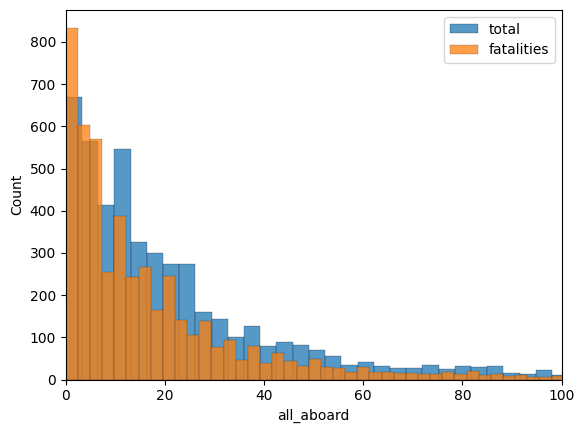

In [54]:
# all aboard, all fatalites and suvivors histogram
column1 = df_planeAccidents['all_aboard']
column2 = df_planeAccidents['all_fatalities']
# Crear el histograma con seaborn
sns.histplot(data=df_planeAccidents, x= 'all_aboard', label = 'total')
sns.histplot(data=df_planeAccidents, x= 'all_fatalities' ,label = 'fatalities')
plt.xlim(0,100)
plt.legend()

In [55]:
# amount of people who died
df_planeAccidents.ground = df_planeAccidents.ground.replace({'no data': 0})
df_planeAccidents.ground = df_planeAccidents.ground.astype('int')

(0.0, 150.0)

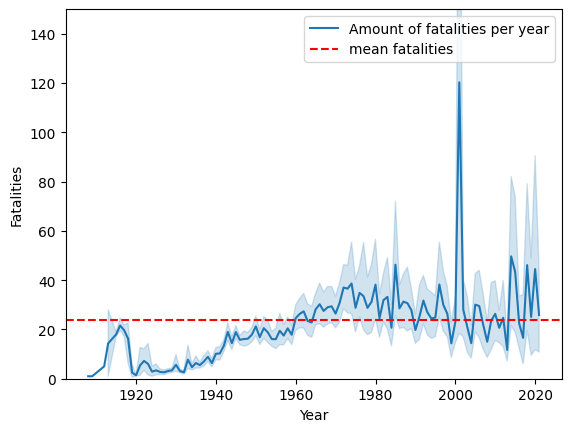

In [56]:
total_fatalities = (df_planeAccidents.ground + df_planeAccidents.all_fatalities)
year = df_planeAccidents.fecha.dt.year
sns.lineplot(x = year, y = total_fatalities, label = 'Amount of fatalities per year')
plt.axhline(total_fatalities.mean(), color='red', linestyle='--', label='mean fatalities')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend()
plt.ylim(0,150)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\4165106611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['year'] = new_data.fecha.dt.year
C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\4165106611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['total_fatalities'] = new_data.all_fatalities + new_data.ground


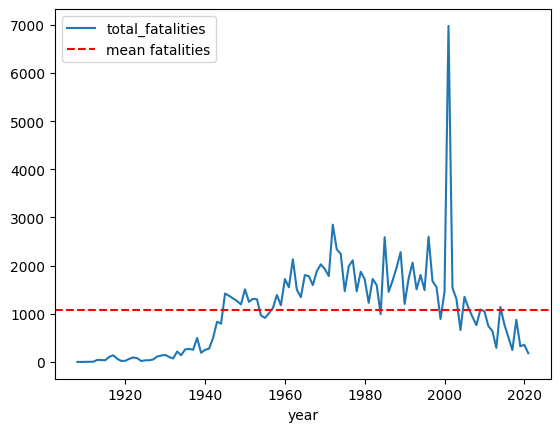

In [57]:
# Compute all tehe amount of fatilities per year
new_data = df_planeAccidents[['fecha','all_fatalities','ground']]
new_data['year'] = new_data.fecha.dt.year
new_data['total_fatalities'] = new_data.all_fatalities + new_data.ground 
df_fatalities = new_data.groupby('year')['total_fatalities'].sum().reset_index().set_index('year')
sns.lineplot(df_fatalities)
plt.axhline(df_fatalities['total_fatalities'].mean(), color='red', linestyle='--', label='mean fatalities')
plt.legend()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\1232454883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_fatalities['year'] = rate_fatalities.fecha.dt.year
C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\1232454883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_fatalities['mortality_rate'] = (rate_fatalities.all_fatalities + rate_fatalities.ground)/(rate_fatalities.all_aboard + rate_fatalities.ground)


<AxesSubplot:xlabel='year'>

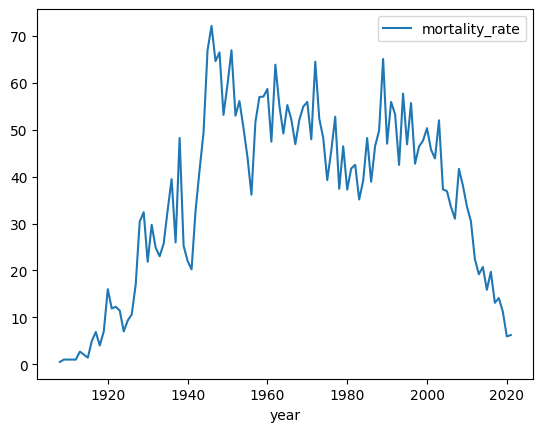

In [58]:
#Computing mortality rate
rate_fatalities = df_planeAccidents[['fecha','all_fatalities','ground','all_aboard']]
rate_fatalities['year'] = rate_fatalities.fecha.dt.year
rate_fatalities['mortality_rate'] = (rate_fatalities.all_fatalities + rate_fatalities.ground)/(rate_fatalities.all_aboard + rate_fatalities.ground) 
rate_fatalities = rate_fatalities.groupby('year')['mortality_rate'].sum().reset_index().set_index('year')
sns.lineplot(rate_fatalities)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\33289426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fatalities['year'] = df_fatalities.fecha.dt.year
C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\33289426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fatalities['total_fatalities'] = df_fatalities.all_fatalities + df_fatalities.ground


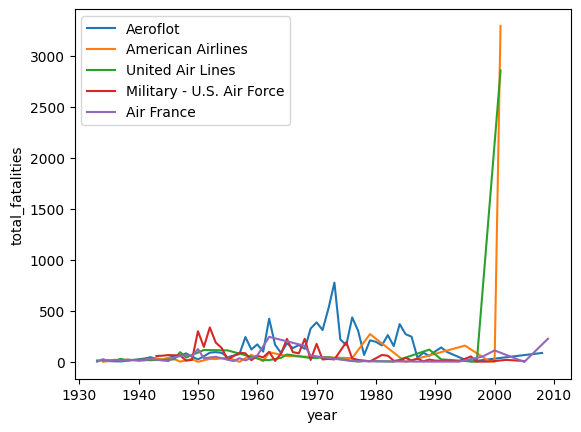

In [59]:
#operators with the highest number of deaths
df_fatalities= df_planeAccidents[['fecha','all_fatalities','ground','operator']]
df_fatalities['year'] = df_fatalities.fecha.dt.year
df_fatalities['total_fatalities'] = df_fatalities.all_fatalities + df_fatalities.ground
df_fatalities_per_operador = df_fatalities.groupby(['operator'])['total_fatalities'].sum().sort_values(ascending=False).reset_index()
#sns.lineplot(data=df_fatalities_per_operador.head(10), x= 'year', y='total_fatalities', hue='operator')
for op in df_fatalities_per_operador.operator.head(5):
    operators = df_fatalities[df_fatalities.operator == op]
    operators = operators.groupby('year')['total_fatalities'].sum().reset_index().sort_values(ascending=False, by='total_fatalities')
    sns.lineplot(x ='year',y='total_fatalities',data=operators, label =op )

In [60]:
df_fatalities_per_operador

,operator,total_fatalities
0,Aeroflot,8837
1,American Airlines,4311
2,United Air Lines,3772
3,Military - U.S. Air Force,3563
4,Air France,1802
...,...,...
2257,Fokker,0
2258,China Airlines,0
2259,Reeve Aleutian Airways,0
2260,US Airways,0


C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\3104772894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_routes['year'] = df_routes.fecha.dt.year
C:\Users\Hp\AppData\Local\Temp\ipykernel_11900\3104772894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_routes['total_fatalities'] = df_routes.all_fatalities + df_routes.ground


<BarContainer object of 10 artists>

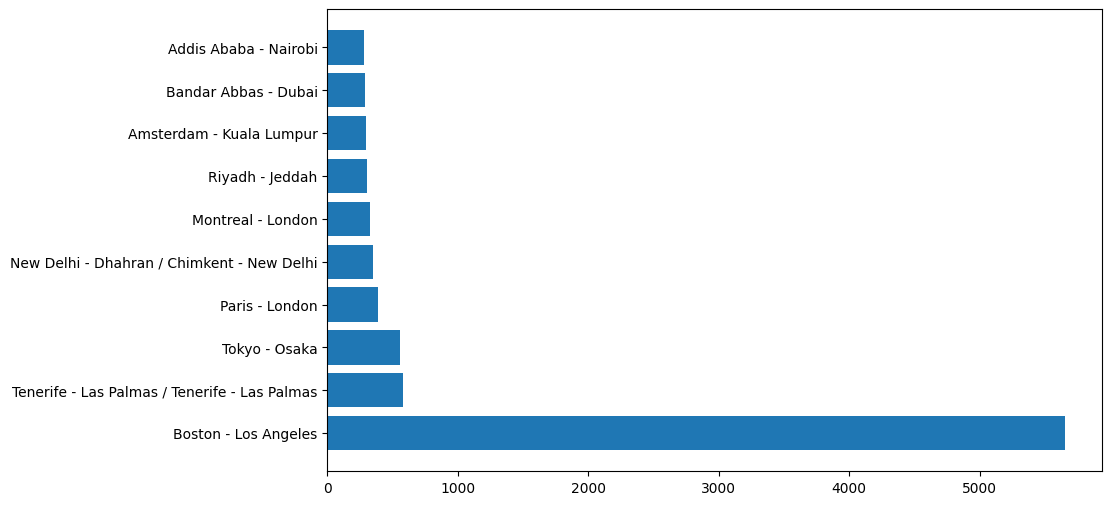

In [61]:
#Most dangeour routes 
df_routes = df_planeAccidents[['route','all_fatalities','ground', 'fecha']]
df_routes['year'] = df_routes.fecha.dt.year
df_routes['total_fatalities'] = df_routes.all_fatalities + df_routes.ground
df_route_grouped = df_routes.groupby(['route'])['total_fatalities'].sum().sort_values(ascending=False).reset_index()
not_= ['no data','Training','test flight']
for i in not_:
    df_route_grouped = df_route_grouped[df_route_grouped.route.ne(i)]
top_10 = df_route_grouped.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['route'], top_10['total_fatalities'])

In [62]:
top_10

,route,total_fatalities
1,Boston - Los Angeles,5657
3,Tenerife - Las Palmas / Tenerife - Las Palmas,583
4,Tokyo - Osaka,557
5,Paris - London,387
6,New Delhi - Dhahran / Chimkent - New Delhi,349
7,Montreal - London,329
8,Riyadh - Jeddah,301
9,Amsterdam - Kuala Lumpur,298
10,Bandar Abbas - Dubai,290
11,Addis Ababa - Nairobi,284


In [64]:
# Grafico del promedio de accidentes los accidentes mortales

# Ordenar el DataFrame por la columna 'Fecha' de forma ascendente
df= df_planeAccidents.sort_values('fecha')

# Calcular la diferencia de tiempo entre accidentes mortales
df['TiempoEntreAccidentes'] = df['fecha'].diff()
# Calcular el tiempo promedio entre accidentes mortales en días
tiempo_promedio = df['TiempoEntreAccidentes'].mean().days

print("Tiempo promedio entre accidentes mortales:", tiempo_promedio, "días")

Tiempo promedio entre accidentes mortales: 8 días


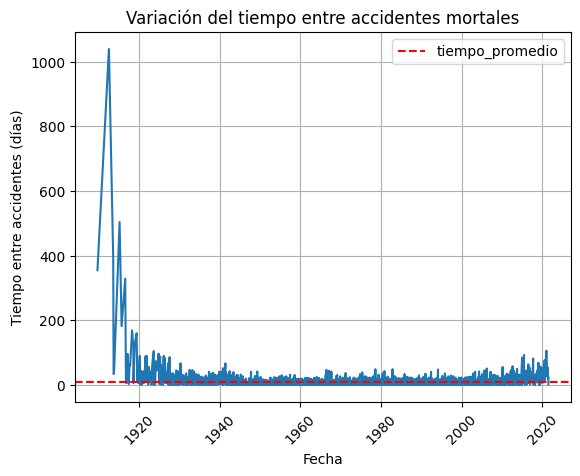

In [69]:
# Crear un gráfico de línea del tiempo entre accidentes mortales
plt.plot(df['fecha'], df['TiempoEntreAccidentes'].dt.days)
plt.axhline(tiempo_promedio, color='red', linestyle='--', label='tiempo_promedio (8 dias)')
plt.xlabel('Fecha')
plt.ylabel('Tiempo entre accidentes (días)')
plt.title('Variación del tiempo entre accidentes mortales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Ingresaré una nueva data para poder observar la cantidad de incidentes durante el ultimo año (2022 - actualidad)

In [98]:
#cargando data
df_2022_2023 = pd.read_csv('datasets/Accidentes_2022_2023.csv')
print(df_2022_2023.shape)
df_2022_2023.head(5)

(5415, 20)


,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,HasSafetyRec,Mode,ReportType,OriginalPublishedDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Findings,DocketUrl
0,CEN23LA199,ACC,192228,2023-05-23T09:15:00Z,Abbeville,LA,USA,NaN,N451PH,False,Aviation,DirectorBrief,NaN,None,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192228
1,WPR23LA194,ACC,192213,2023-05-21T10:30:00Z,Spanish Fork,UT,USA,NaN,N668LD,False,Aviation,DirectorBrief,NaN,Minor,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192213
2,WPR23LA195,ACC,192216,2023-05-21T07:30:00Z,Mobile,AZ,USA,NaN,N108AM,False,Aviation,DirectorBrief,NaN,Minor,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192216
3,WPR23LA193,ACC,192211,2023-05-20T11:30:00Z,American Falls,ID,USA,NaN,N77J,False,Aviation,DirectorBrief,NaN,Minor,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192211
4,GAA23WA153,ACC,192226,2023-05-20T09:31:00Z,Les Combes-Dernier,NaN,SZ,NaN,HB-EQD,False,Aviation,None,NaN,Fatal,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192226


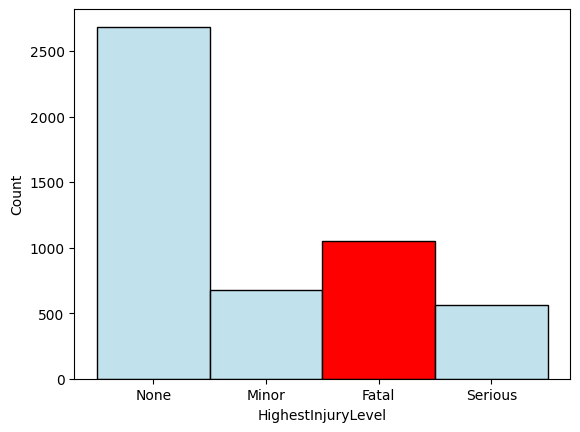

In [95]:
sns.histplot(df_2022_2023.HighestInjuryLevel, color='lightblue')
# Resaltar la barra más alta con otro color
plt.gca().patches[2].set_facecolor('red')

In [109]:
from datetime import datetime
# Creamos una funcion  para convertir la cadena de texto a fecha
def obtener_fecha(fecha_str):
    fecha = datetime.strptime(fecha_str, "%Y-%m-%dT%H:%M:%SZ")
    return fecha.date()

# Aplicar la función a la columna 'Fecha' y crear una nueva columna 'FechaNueva'
df_2022_2023['EventDate'] = df_2022_2023['EventDate'].apply(obtener_fecha)
df_2022_2023.head(2)

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,HasSafetyRec,Mode,ReportType,OriginalPublishedDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Findings,DocketUrl
0,CEN23LA199,ACC,192228,2023-05-23,Abbeville,LA,USA,NaN,N451PH,False,Aviation,DirectorBrief,NaN,None,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192228
1,WPR23LA194,ACC,192213,2023-05-21,Spanish Fork,UT,USA,NaN,N668LD,False,Aviation,DirectorBrief,NaN,Minor,NaN,NaN,NaN,NaN,NaN,https://data.ntsb.gov/Docket?ProjectID=192213


Tiempo promedio entre accidentes mortales: 1 dias


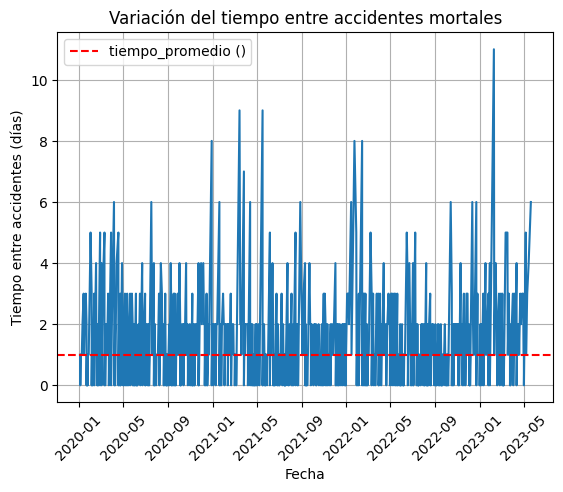

In [122]:
df_dead = df_2022_2023[['EventDate','HighestInjuryLevel']]
df_dead = df_dead[df_dead.HighestInjuryLevel == 'Fatal'].sort_values(by='EventDate' )
# Calcular la diferencia de tiempo entre accidentes mortales
df_dead['TiempoEntreAccidentes'] = df_dead['EventDate'].diff()
# Calcular el tiempo promedio entre accidentes mortales en días
tiempo_promedio = df_dead['TiempoEntreAccidentes'].mean().days
print("Tiempo promedio entre accidentes mortales:", tiempo_promedio, "dias")
# Crear un gráfico de línea del tiempo entre accidentes mortales
plt.plot(df_dead['EventDate'], df_dead['TiempoEntreAccidentes'].dt.days)
plt.axhline(tiempo_promedio, color='red', linestyle='--', label='tiempo_promedio ()')
plt.xlabel('Fecha')
plt.ylabel('Tiempo entre accidentes (días)')
plt.title('Variación del tiempo entre accidentes mortales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



# **KPI's Analysis**

Reducir en 5% la tasa de mortalidad a nivel anual, siendo el número de fallecidos en los accidentes aéreos respecto al total de personas en los vuelos involucrados.

In [ ]:
#Computing mortality rate
rate_fatalities = df_planeAccidents[['fecha','all_fatalities','ground','all_aboard']]
rate_fatalities['year'] = rate_fatalities.fecha.dt.year
rate_fatalities['mortality_rate'] = (rate_fatalities.all_fatalities + rate_fatalities.ground)/(rate_fatalities.all_aboard + rate_fatalities.ground) 
rate_fatalities = rate_fatalities.groupby('year')['mortality_rate'].sum().reset_index().set_index('year').sort_values(ascending=False, by='year')
rate_fatalities.head(2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10612\2088371261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_fatalities['year'] = rate_fatalities.fecha.dt.year
C:\Users\Hp\AppData\Local\Temp\ipykernel_10612\2088371261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_fatalities['mortality_rate'] = (rate_fatalities.all_fatalities + rate_fatalities.ground)/(rate_fatalities.all_aboard+ rate_fatalities.ground)


,mortality_rate
year,
2021,6.225830
2020,5.940175


**Como segundo KPI analizaremos l ruta que ha generado la mayor cantida dde muertos evidenciando sus motivos**

In [ ]:
# examinando el resumen de las rutas que han tenido masyor cantidad de fatalidades
print(top_10[:1])
print(df_planeAccidents[['route','summary','all_aboard','ground']][df_planeAccidents.route.isin(list(top_10[:1].route)) ])

                  route  total_fatalities
1  Boston - Los Angeles              5657
                     route                                            summary  \
4346  Boston - Los Angeles  The aircraft was hijacked shortly after it lef...   
4347  Boston - Los Angeles  The aircraft was hijacked shortly after it lef...   

      all_aboard  ground  
4346          92    2750  
4347          65    2750  


En este caso, se evidencia que a lo largo de los años en una avion de la ruta Boston - Los Angeles hubieron dos secuestro que terminaron con la vida de 5657 personas. Lo que se tendria que tomar en cuenta en este caso seria la seguridad. Impartir mayor seguridad en los vuelos, seria muy util a la hora de reducir la tasa de mortalidad ya que en este caso no solo los secuestradores dañaron a las personas que estuvieron en el avion si no que tambien a personas que estuvieron en tierra.

**como tercer KPI se evaluara el promedio de fatalidades**

In [123]:
tiempo_promedio = df_dead['TiempoEntreAccidentes'].mean().days
print("Tiempo promedio entre accidentes mortales:", tiempo_promedio, "dias")

Tiempo promedio entre accidentes mortales: 1 dias


En este caso, el kpi fue resultado dela nuestra nueva data, la cual nos dice que en promedio muere una persona diaria producto de un accidente en avion. Este valor al ser comparada con la data anteiror resulta ser un valor mucho menor (El anterior valor ue de 8 personas en promedio). Esto nos indica que ha habido una mejora en cuanto a alas medias realizadas para evitar accidentes fatales, que se ve reflejada tambien en la disminucion de la tasa de mortalidad que fueron moistrados anteriormente.

**Como Cuarto KPI se evaluará cuales son las causas mas probables que son causantes de estos accidentes fatales**

In [163]:
df_2022_2023_death = df_2022_2023[df_2022_2023.HighestInjuryLevel=='Fatal'][['EventDate','ProbableCause']]
df_2022_2023_death.dropna(subset=['ProbableCause'],inplace=True)
df_2022_2023_death.head()

,EventDate,ProbableCause
427,2023-01-24,The pilot’s intentional flight into terrain as...
439,2023-01-21,The NTSB determined that the probable cause of...
609,2022-12-03,Not investigated by NTSB
1123,2022-08-18,The pilot's suicide.
1888,2022-04-05,The pilot’s failure to maintain control of the...


In [164]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obtener una lista de palabras clave comunes que indican causas de accidente
stop_words = set(stopwords.words('english'))  # Puedes ajustar el idioma según tus necesidades
causas_clave = ['error', 'failure', 'weather', 'mechanical','crash','hijacked','suicide','exceedance','loss']  # Agrega más palabras clave según sea necesario

# Función para clasificar las causas probables de accidente
def clasificar_causas_probables(texto):
    tokens = word_tokenize(texto.lower())  # Tokenizar el texto en palabras individuales
    causas_probables = [palabra for palabra in tokens if palabra in causas_clave and palabra not in stop_words]
    return causas_probables

# Aplicar la función a la columna "ProbableCause" y crear una nueva columna "CausasProbables"
df_2022_2023_death['CausasProbables'] = df_2022_2023_death['ProbableCause'].apply(clasificar_causas_probables)

# Mostrar las causas probables para cada entrada
df_2022_2023_death[['ProbableCause', 'CausasProbables']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ProbableCause,CausasProbables
427,The pilot’s intentional flight into terrain as...,[suicide]
439,The NTSB determined that the probable cause of...,[suicide]
609,Not investigated by NTSB,[]
1123,The pilot's suicide.,[suicide]
1888,The pilot’s failure to maintain control of the...,[failure]
...,...,...
5383,A severe left roll excursion after the onset o...,[]
5395,The pilot’s impairment/incapacitation from car...,[failure]
5400,"The pilot’s inadequate planning, which resulte...","[loss, exceedance, loss]"
5401,The probable cause of the crash near Mt. Pleas...,"[crash, loss, crash]"


In [169]:
df_2022_2023_death.to_csv('datasets/AccidentesProbably_Causes.csv',index=False)

In [168]:
causas_probables = df_2022_2023_death.CausasProbables.explode('CausasProbables')
causas_probables.value_counts()

loss          196
failure       125
exceedance     54
crash          19
weather        12
suicide         4
mechanical      2
Name: CausasProbables, dtype: int64

<AxesSubplot:>

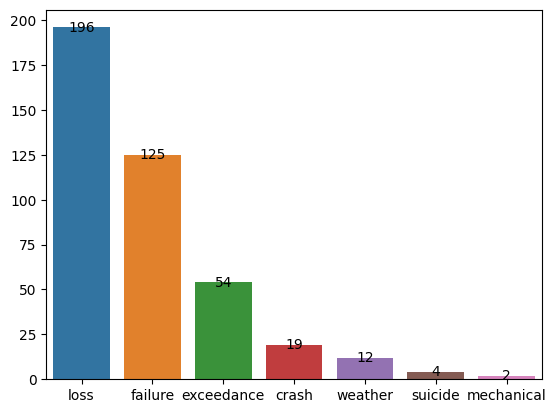

In [206]:
#Realizamos un grafico de barras 
causas = causas_probables.value_counts().index
cantidad = causas_probables.value_counts().values
# Agregar el texto con la cantidad en cada barra
for i in range(len(causas)):
    plt.text(i, cantidad[i], str(cantidad[i]), ha='center', va='center')
sns.barplot(x=causas,y=cantidad)

En este caso se puede observar que la mayor causa es la perdida de control de los aviones debido a **factores metereologicos**, superacion del angulo **critico del avion**, **desorientacion espacial**. Este facto puede ser de gran ayuda a la hora de tomar medidas. Una de ellas seria la capacitacion continua de los pilotos en diversos escenarios medainte simulacion u otros formas de preparacionpara que al momento de enfrentarse estas situaciones las acciones de los pilotos sean las mas correctas posibles y asi poder evitar o disminuir el riesgo de perdidas humanas